In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tueplots import bundles

In [2]:
def calib_errors(ci, coverages):
    ece = 0.0
    ace = 0.0
    for i in range(len(ci)):
        ace += abs(ci[i]-coverages[i])
    ece = ace/len(ci)
    return ace, ece

In [28]:
maes_micro = pd.read_csv(
    '/home/haikoo.khandor/haikoo/Final_ConformalNILM/figure_code/maes_m.csv')
maes_dish = pd.read_csv(
    '/home/haikoo.khandor/haikoo/Final_ConformalNILM/figure_code/maes_d.csv')
maes_fridge = pd.read_csv(
    '/home/haikoo.khandor/haikoo/Final_ConformalNILM/figure_code/maes_f.csv')

In [29]:
# maes_f = np.array(maes).reshape(-1)
maes_f = maes_fridge.values[:, 1]
maes_m = maes_micro.values[:, 1]
maes_d = maes_dish.values[:, 1]

In [30]:
maes_d_new = maes_d

In [31]:
q_level2_f = np.ceil((len(maes_f)+1)*0.2)/len(maes_f)
q_level3_f = np.ceil((len(maes_f)+1)*0.3)/len(maes_f)
q_level4_f = np.ceil((len(maes_f)+1)*0.4)/len(maes_f)
q_hat2_f = np.quantile(maes_f, q_level2_f, interpolation='higher')
q_hat3_f = np.quantile(maes_f, q_level3_f, interpolation='higher')
q_hat4_f = np.quantile(maes_f, q_level4_f, interpolation='higher')
q_level2_d = np.ceil((len(maes_d)+1)*0.2)/len(maes_d)
q_level3_d = np.ceil((len(maes_d)+1)*0.3)/len(maes_d)
q_level4_d = np.ceil((len(maes_d)+1)*0.4)/len(maes_d)
q_hat2_d = np.quantile(maes_d, q_level2_d, interpolation='higher')
q_hat3_d = np.quantile(maes_d, q_level3_d, interpolation='higher')
q_hat4_d = np.quantile(maes_d, q_level4_d, interpolation='higher')
q_level2_m = np.ceil((len(maes_m)+1)*0.2)/len(maes_m)
q_level3_m = np.ceil((len(maes_m)+1)*0.3)/len(maes_m)
q_level4_m = np.ceil((len(maes_m)+1)*0.4)/len(maes_m)
q_hat2_m = np.quantile(maes_m, q_level2_m, interpolation='higher')
q_hat3_m = np.quantile(maes_m, q_level3_m, interpolation='higher')
q_hat4_m = np.quantile(maes_m, q_level4_m, interpolation='higher')

/tmp/ipykernel_604247/2346549424.py:4: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q_hat2_f = np.quantile(maes_f, q_level2_f, interpolation='higher')
/tmp/ipykernel_604247/2346549424.py:5: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q_hat3_f = np.quantile(maes_f, q_level3_f, interpolation='higher')
/tmp/ipykernel_604247/2346549424.py:6: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated N

In [32]:
ci = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
coverages_cal_fridge = np.array([0., 0.10011972, 0.20008979, 0.30013469, 0.40010476,
                                 0.50014966, 0.60011972, 0.70008979, 0.80013469, 0.90017959,
                                 1.])
coverages_cal_microwave = np.array([0., 0.46998395, 0.46998395, 0.46998395, 0.46998395,
                                    0.50064205, 0.8529695, 0.8529695, 0.8529695, 0.90128411,
                                    1.])
coverages_cal_dishwasher = np.array([0., 0.11284109, 0.45329053, 0.45329053, 0.45329053,
                                     0.50497592, 0.93836276, 0.93836276, 0.93836276, 0.93836276,
                                     1.])

In [33]:
ace_fin_cal_f, ece_fin_cal_f = calib_errors(ci, coverages_cal_fridge)
ace_fin_cal_d, ece_fin_cal_d = calib_errors(ci, coverages_cal_dishwasher)
ace_fin_cal_m, ece_fin_cal_m = calib_errors(ci, coverages_cal_microwave)

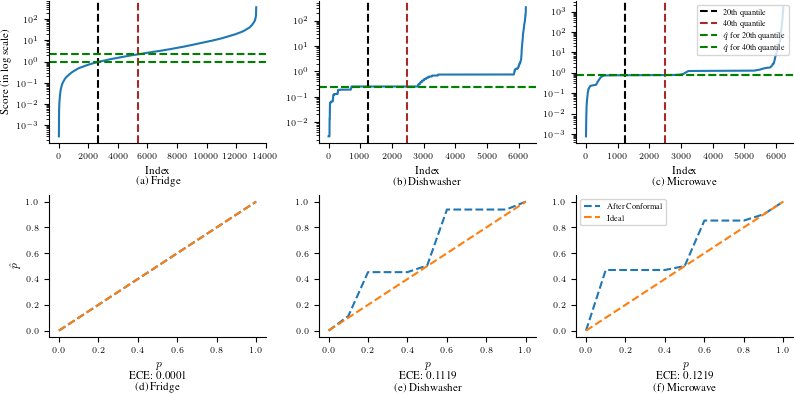

In [34]:
plt.rcParams.update(bundles.icml2022())
plt.rcParams.update({'figure.figsize': (8, 4)})
fig, ax = plt.subplots(2, 3)
ax[0, 0].plot(sorted(maes_f))
ax[0, 0].axvline(0.2*len(maes_f), color='black',
                 linestyle='--', label='20th quantile')
# ax[0, 0].axvline(0.3*len(maes_f), color='blue',
#                  linestyle='--', label='30th quantile')
ax[0, 0].axvline(0.4*len(maes_f), color='brown',
                 linestyle='--', label='40th quantile')
ax[0, 0].axhline(q_hat2_f, color='green', linestyle='--',
                 label='$\hat{q}$ for 20th quantile')
# ax[0, 0].axhline(q_hat3_f, color='green', linestyle='--')
ax[0, 0].axhline(q_hat4_f, color='green', linestyle='--',
                 label='$\hat{q}$ for 40th quantile')
# ax[0, 0].set_ylim(0, 10)
ax[0, 0].set_xlabel('Index \n (a) Fridge')
ax[0, 0].set_ylabel('Score (in log scale)')
ax[0, 0].set_yscale('log')
# ax[0, 0].set_title('Score function Errors - Fridge')
# ax[0, 0].legend(loc='upper right')
sns.despine()

ax[0, 1].plot(maes_d)
ax[0, 1].axvline(0.2*len(maes_d), color='black',
                 linestyle='--', label='20th quantile')
# ax[0, 1].axvline(0.3*len(maes_d), color='blue',
#                  linestyle='--', label='30th quantile')
ax[0, 1].axvline(0.4*len(maes_d), color='brown',
                 linestyle='--', label='40th quantile')
ax[0, 1].axhline(q_hat2_d, color='green', linestyle='--',
                 label='$\hat{q}$ for 20th quantile')
# ax[0, 1].axhline(q_hat3_d, color='green', linestyle='--')
ax[0, 1].axhline(q_hat4_d, color='green', linestyle='--',
                 label='$\hat{q}$ for and 40th quantile')
# ax[0, 1].set_ylim(0, 10)
ax[0, 1].set_xlabel('Index \n (b) Dishwasher')
ax[0, 1].set_yscale('log')

# ax[0, 1].set_ylabel('Error')
# ax[0, 1].set_title('Score function Errors - Dishwasher')
# ax[0,1].legend(loc='upper right')
sns.despine()

ax[0, 2].plot(maes_m)
ax[0, 2].axvline(0.2*len(maes_m), color='black',
                 linestyle='--', label='20th quantile')
# ax[0, 2].axvline(0.3*len(maes_m), color='blue',
#                  linestyle='--', label='30th quantile')
ax[0, 2].axvline(0.4*len(maes_m), color='brown',
                 linestyle='--', label='40th quantile')
ax[0, 2].axhline(q_hat2_m, color='green', linestyle='--',
                 label='$\hat{q}$ for 20th quantile')
# ax[0, 2].axhline(q_hat3_m, color='green', linestyle='--')
ax[0, 2].axhline(q_hat4_m, color='green', linestyle='--',
                 label='$\hat{q}$ for 40th quantile')
# ax[0, 2].set_ylim(0, 10)
ax[0, 2].set_xlabel('Index \n (c) Microwave')
# ax[0, 2].set_ylabel('Error')
# ax[0, 2].set_title('Score function Errors - Microwave')
ax[0, 2].legend(loc='upper right')
ax[0, 2].set_yscale('log')

ax[1, 0].plot(ci, coverages_cal_fridge,
              label='After Conformal', linestyle='--')
ax[1, 0].plot([0, 1], [0, 1], label="Ideal", linestyle='--')
# ax[1, 0].set_title(
#     f'Calibration dataset: After Calibration ECE: {"{:.4f}".format(ece_fin_cal_f)}')
ax[1, 0].set_xlabel(
    f'$p$ \n ECE: {"{:.4f}".format(ece_fin_cal_f)} \n (d) Fridge')
ax[1, 0].set_ylabel('$\hat{p}$')
# ax[1, 0].legend()

ax[1, 1].plot(ci, coverages_cal_dishwasher,
              label='After Conformal', linestyle='--')
ax[1, 1].plot([0, 1], [0, 1], label="Ideal", linestyle='--')
# ax[1, 1].set_title(
#     f'Calibration dataset: After Calibration ECE: {"{:.4f}".format(ece_fin_cal_d)}')
ax[1, 1].set_xlabel(
    f'$p$ \n ECE: {"{:.4f}".format(ece_fin_cal_d)} \n (e) Dishwasher')
# ax[1, 1].set_ylabel('$\hat{p}$')
# ax[1,1].legend()

ax[1, 2].plot(ci, coverages_cal_microwave,
              label='After Conformal', linestyle='--')
ax[1, 2].plot([0, 1], [0, 1], label="Ideal", linestyle='--')
# ax[1, 2].set_title(
#     f'Calibration dataset: After Calibration ECE: {"{:.4f}".format(ece_fin_cal_m)}')
ax[1, 2].set_xlabel(
    f'$p$ \n ECE: {"{:.4f}".format(ece_fin_cal_m)} \n (f) Microwave')
# ax[1, 2].set_ylabel('$\hat{p}$')
ax[1, 2].legend()
sns.despine()
# plt.savefig(
# f'/home/haikoo.khandor/haikoo/exp conformal/con_figures/combined_Homo_Conformal_MAEs_plot.pdf')

after smoothing

In [35]:
# maes_micro_smooth = pd.read_csv(
#     '/home/haikoo.khandor/haikoo/final conformal/notebooks/microwave/s2p/mlp/maes_smooth.csv')
maes_dish_smooth = pd.read_csv(
    '/home/haikoo.khandor/haikoo/Final_ConformalNILM/figure_code/maes_smooth.csv')

In [36]:
# maes_f = maes_fridge.values[:, 1]
# maes_m = maes_micro_smooth.values[:, 1]
maes_d = maes_dish_smooth.values[:, 1]

In [37]:
q_level2_d = np.ceil((len(maes_d)+1)*0.2)/len(maes_d)
q_level3_d = np.ceil((len(maes_d)+1)*0.3)/len(maes_d)
q_level4_d = np.ceil((len(maes_d)+1)*0.4)/len(maes_d)
q_hat2_d = np.quantile(maes_d, q_level2_d, interpolation='higher')
q_hat3_d = np.quantile(maes_d, q_level3_d, interpolation='higher')
q_hat4_d = np.quantile(maes_d, q_level4_d, interpolation='higher')

/tmp/ipykernel_604247/1701724113.py:4: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q_hat2_d = np.quantile(maes_d, q_level2_d, interpolation='higher')
/tmp/ipykernel_604247/1701724113.py:5: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q_hat3_d = np.quantile(maes_d, q_level3_d, interpolation='higher')
/tmp/ipykernel_604247/1701724113.py:6: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated N

In [38]:
ci = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
# coverages_cal_fridge = np.array([0., 0.10266387, 0.20390602, 0.30447471, 0.40264891,
#                                  0.5050883, 0.59869799, 0.7009129, 0.79931158, 0.9004789,
#                                  1.])
# coverages_cal_microwave = np.array([0., 0.06276083, 0.07560193, 0.0905297, 0.49069021,
#                                     0.5024077, 0.5141252, 0.85457464, 0.88491172, 0.91268058,
#                                     1.])
coverages_cal_dishwasher = np.array([0., 0.11316212, 0.11492777, 0.45329053, 0.45345104,
                                     0.50497592, 0.55441413, 0.55441413, 0.93836276, 0.9388443,
                                     1.])

In [39]:
# ace_fin_cal_f, ece_fin_cal_f = calib_errors(ci, coverages_cal_fridge)
ace_fin_cal_d, ece_fin_cal_d = calib_errors(ci, coverages_cal_dishwasher)
# ace_fin_cal_m, ece_fin_cal_m = calib_errors(ci, coverages_cal_microwave)

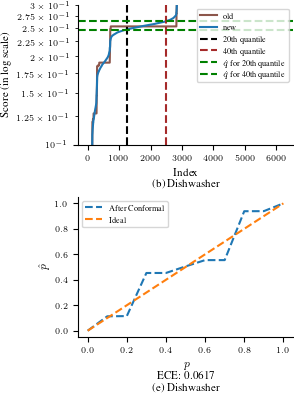

In [40]:
plt.rcParams.update(bundles.icml2022())
plt.rcParams.update({'figure.figsize': (3, 4)})
fig, ax = plt.subplots(2, 1)
# ax[0, 0].plot(sorted(maes_f))
# ax[0, 0].axvline(0.2*len(maes_f), color='black',
#                  linestyle='--', label='20th quantile')
# # ax[0, 0].axvline(0.3*len(maes_f), color='blue',
# #                  linestyle='--', label='30th quantile')
# ax[0, 0].axvline(0.4*len(maes_f), color='brown',
#                  linestyle='--', label='40th quantile')
# ax[0, 0].axhline(q_hat2_f, color='green', linestyle='--',
#                  label='$\hat{q}$ for 20th quantile')
# # ax[0, 0].axhline(q_hat3_f, color='green', linestyle='--')
# ax[0, 0].axhline(q_hat4_f, color='green', linestyle='--', label='$\hat{q}$ for 40th quantile')
# # ax[0, 0].set_ylim(0, 5)
# ax[0, 0].set_xlabel('Index \n (a) Fridge')
# ax[0, 0].set_ylabel('Score')
# # ax[0, 0].set_title('Score function Errors - Fridge')
# # ax[0, 0].legend(loc='upper right')
# sns.despine()

ax[0].plot(maes_d_new, label='old', color='tab:brown')
ax[0].plot(maes_d, label='new', color='tab:blue')

ax[0].axvline(0.2*len(maes_d), color='black',
              linestyle='--', label='20th quantile')
# ax[0, 1].axvline(0.3*len(maes_d), color='blue',
#                  linestyle='--', label='30th quantile')
ax[0].axvline(0.4*len(maes_d), color='brown',
              linestyle='--', label='40th quantile')
ax[0].axhline(q_hat2_d, color='green', linestyle='--',
              label='$\hat{q}$ for 20th quantile')
# ax[0, 1].axhline(q_hat3_d, color='green', linestyle='--')
ax[0].axhline(q_hat4_d, color='green', linestyle='--',
              label='$\hat{q}$ for 40th quantile')
ax[0].set_ylim(0.1, 0.3)
ax[0].set_xlabel('Index \n (b) Dishwasher')
ax[0].set_ylabel('Score (in log scale)')
# ax[0, 1].set_title('Score function Errors - Dishwasher')
ax[0].legend(loc='upper right')
ax[0].set_yscale('log')
sns.despine()

# ax[0, 2].plot(maes_m)
# ax[0, 2].axvline(0.2*len(maes_m), color='black',
#                  linestyle='--', label='20th quantile')
# # ax[0, 2].axvline(0.3*len(maes_m), color='blue',
# #                  linestyle='--', label='30th quantile')
# ax[0, 2].axvline(0.4*len(maes_m), color='brown',
#                  linestyle='--', label='40th quantile')
# ax[0, 2].axhline(q_hat2_m, color='green', linestyle='--',
#                  label='$\hat{q}$ for 20th quantile')
# # ax[0, 2].axhline(q_hat3_m, color='green', linestyle='--')
# ax[0, 2].axhline(q_hat4_m, color='green', linestyle='--', label='$\hat{q}$ for 40th quantile')
# ax[0, 2].set_ylim(0, 2)
# ax[0, 2].set_xlabel('Index \n (c) Microwave')
# ax[0, 2].set_ylabel('Error')
# ax[0, 2].set_title('Score function Errors - Microwave')
# ax[0,2].legend(loc='upper right')
# ax[1, 0].plot(ci, coverages_cal_fridge,
#               label='After Conformal', linestyle='--')
# ax[1, 0].plot([0, 1], [0, 1], label="Ideal", linestyle='--')
# # ax[1, 0].set_title(
# #     f'Calibration dataset: After Calibration ECE: {"{:.4f}".format(ece_fin_cal_f)}')
# ax[1, 0].set_xlabel(f'$p$ \n ECE: {"{:.4f}".format(ece_fin_cal_f)} \n (d) Fridge')
# ax[1, 0].set_ylabel('$\hat{p}$')


ax[1].plot(ci, coverages_cal_dishwasher,
           label='After Conformal', linestyle='--')
ax[1].plot([0, 1], [0, 1], label="Ideal", linestyle='--')
# ax[1, 1].set_title(
#     f'Calibration dataset: After Calibration ECE: {"{:.4f}".format(ece_fin_cal_d)}')
ax[1].set_xlabel(
    f'$p$ \n ECE: {"{:.4f}".format(ece_fin_cal_d)} \n (e) Dishwasher')
ax[1].set_ylabel('$\hat{p}$')
ax[1].legend()

# ax[1, 2].plot(ci, coverages_cal_microwave,
#               label='After Conformal', linestyle='--')
# ax[1, 2].plot([0, 1], [0, 1], label="Ideal", linestyle='--')
# # ax[1, 2].set_title(
# #     f'Calibration dataset: After Calibration ECE: {"{:.4f}".format(ece_fin_cal_m)}')
# ax[1, 2].set_xlabel(f'$p$ \n ECE: {"{:.4f}".format(ece_fin_cal_m)} \n (f) Microwave')
# # ax[1, 2].set_ylabel('$\hat{p}$')
# ax[1, 2].legend()
# sns.despine()

# plt.savefig(
#     f'/home/haikoo.khandor/haikoo/exp conformal/con_figures/combined_Homo_Conformal_MAEs_plot_smoothened.pdf')